In [1]:
import numpy as np
import numpy.random as random
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns

### Ex2.1 truncated mormal

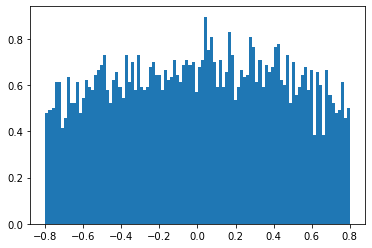

In [2]:
n = 10000
x = random.normal(0, 1, n)
s = np.array([])

for i in x:
    if -0.8 <= i <= 0.8:
        s = np.append(s, i)

plt.hist(s, bins=100, density=True)
plt.show()

### not enough samples: less than n

### Ex2.1 sol

In [ ]:
n = 100000

a = 0.8
x_accepted = np.array([])

while len( x_accepted ) < n:
    x = np.random.normal(0, 1)
    if -a <= x <= a:
        # ensure that there are n samples
        x_accepted = np.append(x_accepted , x)

plt.hist(x_accepted , bins=100 , density=True)
plt.show ()

### Ex2.2

In [ ]:
n = 10000
a = 0.5
b = 0.5
sd = 0.15

def mu(x):
    return a*np.cos(x) + b

x = np.random.uniform(-10, 10, n)

# sol: usage of properties of numpy array
y = a * np.cos(x) + b + sd*random.normal(0, 1, n)

# originalcode, which also fine
y_p = [np.random.normal(mu(i), sd**2, 1) for i in x]

# scatter plot the samples
fig, ax = plt.subplots(2, 1, figsize=(30, 12))
ax[0].scatter(x, y, s=4, c="pink")
ax[1].hist(y, bins=100, density=True)
# plot y marginally
plt.show()

### Ex2.3

In [ ]:
mu = [-2, -1, 0, 1, 2]
w = [0.1, 0.2, 0.3, 0.2, 0.2]
sd = [0.5, 0.1, 0.5, 0.2, 0.5]

n = 10000
sp_list = []
pool = [0, 1, 2, 3, 4]

# Box-Muller
x1 = np.random.uniform(0, 2*np.pi, 1)
x2 = np.random.uniform(0, 1, 1)
# exponential inversion
x2t = -2*np.log(1-x2)
# a sample from N(0, 1)
y1 = x1**0.5*np.cos(x2t)

def weighted_sp(n):
    for i in range(n):
        # return an index on a given weight
        inx = rn.choices(pool, weights=w)

        # a sample from N(mu_k, sigma_sqr_k) with weights
        sp = y1*sd[inx[0]] + mu[inx[0]]*w[inx[0]]
        sp_list.append(sp)

    return sp_list

# if truncated at [mu - 0.1, mu + 0.1]
# add a 'if' condition after sp before adding it to sp_list

In [ ]:
sample = weighted_sp(10000)
plt.hist(sample, bins=122, density=True)

## Ex 2.3 sol

In [ ]:
mu = [-2, -1, 0, 1, 2]
w = [0.1, 0.2, 0.3, 0.2, 0.2]
sd = [0.5, 0.1, 0.5, 0.2, 0.5]
pool = [0, 1, 2, 3, 4]

w_sample = np.zeros(n)
n = 100000
w_sum = np.cumsum(w)

# sample 1 observ
def discrete(w, w_sum):
    u = np.random.uniform(0, 1, 1)
    # sample the k.th weight from p_k 
    for i in range(len(w)):
        if w_sum[i] > u:
            sample = pool[i]
            break
    return sample

# sample n obs
for i in range(n):
    # already defined w n w_sum in this func, so no need to be in sample
    s = discrete(w, w_sum)
    w_sample[i] = np.random.normal(mu[s], sd[s], 1)

# plotting
plt.hist(w_sample, bins=80, density=True, rwidth=0.8, color='r', alpha=0.5)
plt.show()

# 